# Part I - (ProsperLoanData)
## by Ngoc Tran

## Introduction
I selected the Loan Data from Prosper for my analysis, which includes 113,937 loans across 81 variables. I focused on the fields below to gain insights into new loan origination.
BorrowerRate
ProsperRating(numeric)
BorrowerState
EmploymentStatus
IsBorrowerHomeowner
CreditScoreRangeUper
LoanOriginalAmount
LoanOriginationDate
Listing Category
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\ngoct\OneDrive\Documents\UDACITY\Submit_Final\prosperLoanData.csv')
df.shape

(113937, 81)

In [4]:
df_stateregion = pd.read_excel(r'C:\Users\ngoct\OneDrive\Documents\UDACITY\Submit_Final\stateregion.xlsx')
df_stateregion.sample(10)

,BorrowerState,Region
45,VA,South
36,OR,West
0,AL,South
33,ND,Midwest
48,WI,Midwest
32,NC,South
12,IL,Midwest
21,MI,Midwest
14,IA,Midwest
9,GA,South


I filtered specific columns for my analysis: BorrowerRate, LoanOriginalAmount, ProsperRating (numeric), BorrowerState, IsBorrowerHomeowner, CreditScoreRangeUpper, LoanOriginationDate, and ListingCategory (numeric).

In [5]:
cols = ['BorrowerRate', 'ProsperRating (numeric)','BorrowerState', 'IsBorrowerHomeowner',
        'CreditScoreRangeUpper', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingCategory (numeric)', ]
df_subset1 = df[cols]

I created my own state-to-region grouping for the analysis using a left join.

In [6]:
df_subset = pd.merge(df_subset1,df_stateregion[['BorrowerState','Region']],on='BorrowerState', how='left')

In [7]:
df_subset.sample(20)

,BorrowerRate,ProsperRating (numeric),BorrowerState,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,LoanOriginationDate,ListingCategory (numeric),Region
93895,0.0750,NaN,CA,True,759.0,2550,2007-01-17 00:00:00,0,West
34630,0.1100,NaN,NaN,False,739.0,2000,2006-09-22 00:00:00,0,NaN
28877,0.2489,3.0,IN,True,739.0,13000,2012-11-07 00:00:00,1,Midwest
88160,0.1400,NaN,IL,True,739.0,7000,2010-11-05 00:00:00,1,Midwest
85862,0.2552,3.0,MN,True,799.0,3000,2012-01-12 00:00:00,19,Midwest
93012,0.1190,NaN,CA,False,719.0,9000,2007-09-27 00:00:00,0,West
58854,0.3177,1.0,CA,True,759.0,4000,2012-12-28 00:00:00,15,West
104864,0.1199,6.0,NY,True,699.0,4000,2014-02-26 00:00:00,1,Northeast
33224,0.2958,2.0,OH,True,679.0,4000,2012-04-23 00:00:00,1,Midwest
7566,0.1639,5.0,CA,False,719.0,4000,2013-05-22 00:00:00,7,West


In [8]:
#Rename Specific Columns
df_subset = df_subset.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (numeric)': 'ProsperRating'})

In [9]:
df_subset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BorrowerRate           113937 non-null  float64
 1   ProsperRating          84853 non-null   float64
 2   BorrowerState          108422 non-null  object 
 3   IsBorrowerHomeowner    113937 non-null  bool   
 4   CreditScoreRangeUpper  113346 non-null  float64
 5   LoanOriginalAmount     113937 non-null  int64  
 6   LoanOriginationDate    113937 non-null  object 
 7   ListingCategory        113937 non-null  int64  
 8   Region                 108040 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 7.9+ MB


In [10]:
#Convert LoanOriginationDate from object to datetime
df_subset['LoanOriginationDate'] = pd.to_datetime(df_subset['LoanOriginationDate'])

In [481]:
# create a representation of the year with strfmt
df_subset['year_LoanOriginationDate'] = df_subset['LoanOriginationDate'].map(lambda dt: dt.strftime('%Y'))

In [482]:
df_subset['year_LoanOriginationDate']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: year_LoanOriginationDate, Length: 113937, dtype: object

In [483]:
#Convert year_LoanOriginationDate from object to datetime
df_subset['year_LoanOriginationDate'] = pd.to_datetime(df_subset['year_LoanOriginationDate'])

In [484]:
df_subset['year_LoanOriginationDate']

0        2007-01-01
1        2014-01-01
2        2007-01-01
3        2012-01-01
4        2013-01-01
            ...    
113932   2013-01-01
113933   2011-01-01
113934   2013-01-01
113935   2011-01-01
113936   2014-01-01
Name: year_LoanOriginationDate, Length: 113937, dtype: datetime64[ns]

In [485]:
#subtract the year and month
df_subset['year_LoanOriginationDate'] = pd.to_datetime(df_subset['year_LoanOriginationDate'])
df_subset['year'], df_subset['month'] = df_subset['year_LoanOriginationDate'].dt.year, df_subset['year_LoanOriginationDate'].dt.month

In [486]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  bool          
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  int64         
 8   Region                    108040 non-null  object        
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
dtypes:

In [487]:
df_subset.sample(5)

,BorrowerRate,ProsperRating,BorrowerState,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,LoanOriginationDate,ListingCategory,Region,year_LoanOriginationDate,year,month
99650,0.1774,4.0,TX,True,739.0,4000,2012-08-17,2,South,2012-01-01,2012,1
72542,0.1239,6.0,MA,True,799.0,10000,2013-12-19,1,Northeast,2013-01-01,2013,1
112081,0.2900,NaN,NaN,False,559.0,4300,2007-04-26,0,NaN,2007-01-01,2007,1
101784,0.1300,NaN,NaN,False,759.0,3000,2006-05-03,0,NaN,2006-01-01,2006,1
9044,0.1899,4.0,MO,True,759.0,4000,2011-09-26,1,Midwest,2011-01-01,2011,1


### What is the structure of your dataset?
The dataset contains 113,937 records and 11 columns.
### What is/are the main feature(s) of interest in your dataset?
In this project, I aim to identify which factors influence the New Loan Origination Amount and BorrowerRate.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect the following factors to impact the New Loan Origination Amount: ProsperRating (numeric), BorrowerState (grouped by region), IsBorrowerHomeowner, CreditScoreRangeUpper, and Listing Category. However, I anticipate that CreditScoreRangeUpper will have the most significant effect on both LoanOriginalAmount and BorrowerRate.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


# LoanOriginationDate

<Axes: title={'center': 'Total Count of Loans Origination in Year'}, xlabel='year', ylabel='Total Count'>

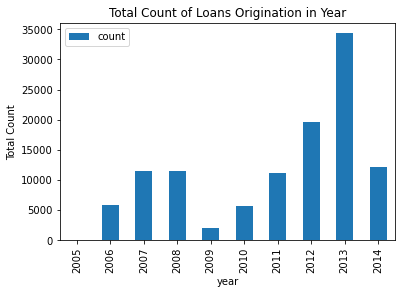

In [488]:
grouped_df = df_subset.groupby('year').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='year', y='count', title='Total Count of Loans Origination in Year', ylabel='Total Count',  grid = False)

As shown in the chart, the total number of loan originations peaked in 2013.

In [489]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  bool          
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  int64         
 8   Region                    108040 non-null  object        
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
dtypes:

# BorrowerRate


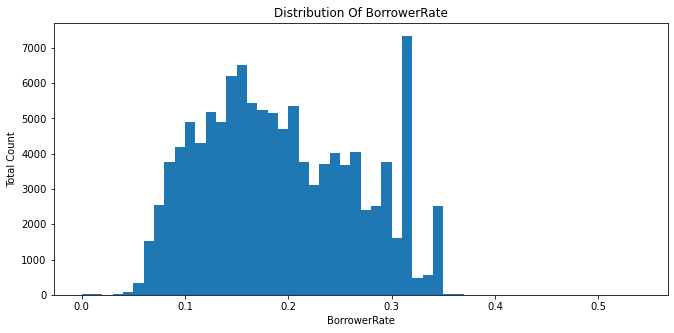

In [490]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 5
bins = np.arange(0, df_subset.BorrowerRate.max() + 0.05, 0.01)
plt.hist(data = df_subset, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Total Count')
plt.title('Distribution Of BorrowerRate')
plt.grid(False);

The BorrowerRate shows a bell curve between 0.5 and 0.3, with noticeable spikes at 0.15, 0.2, 0.3, 0.32, and 0.35. The highest number of loans occurs at a BorrowerRate of 0.32.

The distribution shows a bell curve from 0.05 to 0.3, peaking at 0.15 and gradually declining until 0.3. After 0.3, there are peaks at 0.31 and 0.35, with 0.31 being the highest point in the chart. Only six loan accounts have a BorrowerRate greater than 0.4.

In [491]:
df_subset[df_subset.BorrowerRate > 0.4]

,BorrowerRate,ProsperRating,BorrowerState,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,LoanOriginationDate,ListingCategory,Region,year_LoanOriginationDate,year,month
18326,0.4500,NaN,NaN,False,NaN,3000,2006-03-15,0,NaN,2006-01-01,2006,1
22195,0.4500,NaN,NaN,False,NaN,1789,2006-03-17,0,NaN,2006-01-01,2006,1
36018,0.4975,NaN,NaN,False,NaN,1500,2006-02-27,0,NaN,2006-01-01,2006,1
56761,0.4975,NaN,NaN,False,NaN,3000,2006-03-21,0,NaN,2006-01-01,2006,1
82043,0.4800,NaN,NaN,False,NaN,3000,2006-03-07,0,NaN,2006-01-01,2006,1
103973,0.4500,NaN,NaN,False,NaN,2800,2006-03-09,0,NaN,2006-01-01,2006,1


# LoanOriginalAmount
Next, we will examine the distribution of 'LoanOriginalAmount'.

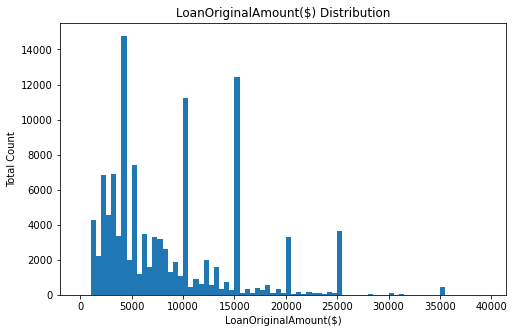

In [492]:
rcParams['figure.figsize'] = 8, 5
income_bins = np.arange(0, 40000, 500)
plt.hist(data = df_subset, x='LoanOriginalAmount', bins = income_bins);
plt.xlabel('LoanOriginalAmount($)')
plt.ylabel('Total Count')
plt.title('LoanOriginalAmount($) Distribution');


The chart shows that the distribution of Loan Original Amount is right-skewed, with many loans being less than $25k. There are six significant spikes in the chart at the amounts of $3k, $10k, $15k, $20k, $25k, and $35k.

# BorrowerState


I grouped the states into four regions.

In [493]:
df_subset['Region'].value_counts()

South        34411
West         27820
Midwest      24727
Northeast    21082
Name: Region, dtype: int64

In [494]:
# set dtype of 'BorrowerState' to category
state_order = df_subset['Region'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = state_order)
df_subset['Region'] = df_subset['Region'].astype(ordered_var)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  bool          
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  int64         
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
dtypes:

In [495]:
region_ordered = df_subset.Region.value_counts().sort_values(ascending = True)
region_ordered

Northeast    21082
Midwest      24727
West         27820
South        34411
Name: Region, dtype: int64

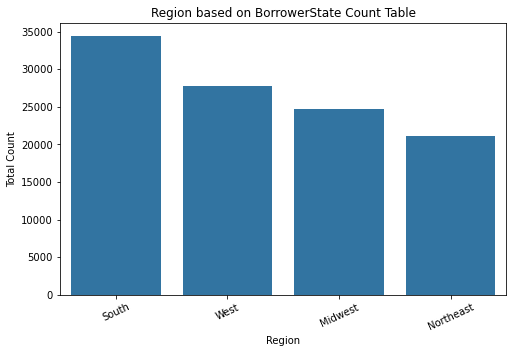

In [496]:
base_color = sb.color_palette()[0]
# plot the data
sb.countplot(data = df_subset, x = 'Region', color = base_color)
plt.xticks(rotation = 25)
plt.title('Region based on BorrowerState Count Table')
plt.xlabel('Region')
plt.ylabel('Total Count')
plt.grid(False);



The South Region has the highest total count of loan originations, followed by the West, Midwest, and Northeast regions, respectively.

# IsBorrowerHomeowner

In [497]:
owner_order = df_subset['IsBorrowerHomeowner'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = owner_order)
df_subset['IsBorrowerHomeowner'] = df_subset['IsBorrowerHomeowner'].astype(ordered_var)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  int64         
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
dtypes:

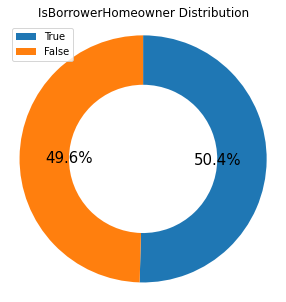

In [498]:
textprops = {"fontsize":15}
sorted_verify = pd.DataFrame(df_subset['IsBorrowerHomeowner'].value_counts().reset_index())
labels = sorted_verify['index']
plt.pie(data = sorted_verify, x='IsBorrowerHomeowner', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%', textprops =textprops);
plt.axis('square');
plt.title('IsBorrowerHomeowner Distribution')
plt.legend(labels);

The donut chart reveals that 50.4% of borrowers are homeowners, while 49.6% are not homeowners, highlighting an interesting balance between the two groups.

# CreditScoreRangeUpper


I created buckets for the CreditScoreRange.

In [499]:
bins = [499, 599, 699, 799, 899]
df_subset['creditscorerangeup_bin'] = pd.cut(df_subset['CreditScoreRangeUpper'], bins)
print (df_subset)

        BorrowerRate  ProsperRating  ... month creditscorerangeup_bin
0             0.1580            NaN  ...     1         (599.0, 699.0]
1             0.0920            6.0  ...     1         (599.0, 699.0]
2             0.2750            NaN  ...     1                    NaN
3             0.0974            6.0  ...     1         (799.0, 899.0]
4             0.2085            3.0  ...     1         (599.0, 699.0]
...              ...            ...  ...   ...                    ...
113932        0.1864            4.0  ...     1         (699.0, 799.0]
113933        0.1110            6.0  ...     1         (699.0, 799.0]
113934        0.2150            3.0  ...     1         (699.0, 799.0]
113935        0.2605            4.0  ...     1         (599.0, 699.0]
113936        0.1039            6.0  ...     1         (599.0, 699.0]

[113937 rows x 13 columns]


In [500]:
df_subset

,BorrowerRate,ProsperRating,BorrowerState,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,LoanOriginationDate,ListingCategory,Region,year_LoanOriginationDate,year,month,creditscorerangeup_bin
0,0.1580,NaN,CO,True,659.0,9425,2007-09-12,0,West,2007-01-01,2007,1,"(599.0, 699.0]"
1,0.0920,6.0,CO,False,699.0,10000,2014-03-03,2,West,2014-01-01,2014,1,"(599.0, 699.0]"
2,0.2750,NaN,GA,False,499.0,3001,2007-01-17,0,South,2007-01-01,2007,1,NaN
3,0.0974,6.0,GA,True,819.0,10000,2012-11-01,16,South,2012-01-01,2012,1,"(799.0, 899.0]"
4,0.2085,3.0,MN,True,699.0,15000,2013-09-20,2,Midwest,2013-01-01,2013,1,"(599.0, 699.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.1864,4.0,IL,True,719.0,10000,2013-04-22,1,Midwest,2013-01-01,2013,1,"(699.0, 799.0]"
113933,0.1110,6.0,PA,True,719.0,2000,2011-11-07,7,Northeast,2011-01-01,2011,1,"(699.0, 799.0]"
113934,0.2150,3.0,TX,True,719.0,10000,2013-12-23,1,South,2013-01-01,2013,1,"(699.0, 799.0]"
113935,0.2605,4.0,GA,True,699.0,15000,2011-11-21,2,South,2011-01-01,2011,1,"(599.0, 699.0]"


In [501]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  int64         
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
 12  cr

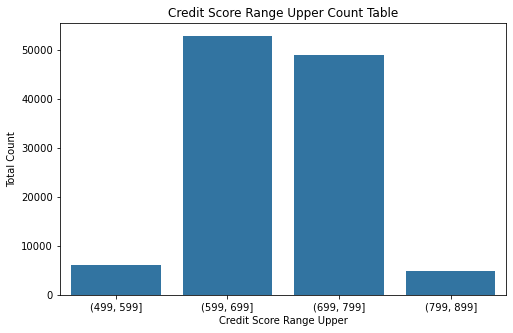

In [502]:
base_color = sb.color_palette()[0]
# plot the data
sb.countplot(data = df_subset, x = 'creditscorerangeup_bin', color = base_color)
plt.xticks(rotation = 0)
plt.title('Credit Score Range Upper Count Table')
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Total Count')
plt.grid(False);

The chart shows a bell curve for Loan origination based on Credit Score Range Upper. The majority of loan originations occur for borrowers with credit scores between 599 to 699 and 699 to 799. The least total counts are found in the ranges of 499 to 599 and 799 to 899, which makes sense: banks are less likely to issue loans to those with low credit scores, while those with high credit scores tend to borrow less.

# ListingCategory


In [503]:
# set dtype of 'ListingCategory (numeric)' to category
list_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = list_order)
df_subset['ListingCategory'] = df_subset['ListingCategory'].astype(ordered_var)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  category      
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
 12  cr

In [504]:
ListingCat_ordered = df_subset.ListingCategory.value_counts().sort_values(ascending = True)
ListingCat_ordered

17       52
12       59
9        85
10       91
8       199
11      217
16      304
5       756
19      768
20      771
14      876
18      885
15     1522
13     1996
4      2395
6      2572
3      7189
2      7433
7     10494
0     16965
1     58308
Name: ListingCategory, dtype: int64

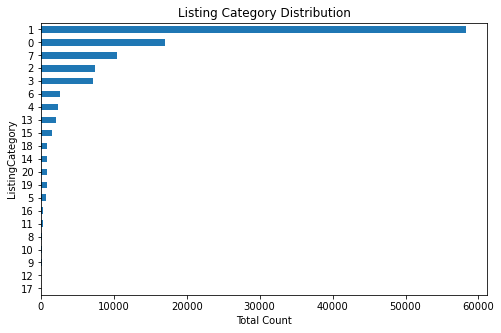

In [505]:
rcParams['figure.figsize'] = 8, 5
ListingCat_ordered.plot(kind = 'barh', grid = False)
plt.ylabel('ListingCategory')
plt.xlabel('Total Count')
plt.title('Listing Category Distribution');

The chart reveals the top five listing categories selected by borrowers when posting their listings:
1: Debt Consolidation
0: Not available
7: Other
2: Home Improvement
3: Business

# Loan Original Amount

In [506]:
df_subset['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

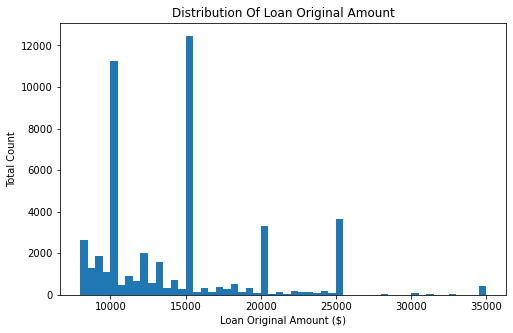

In [507]:
# use the mean as the starting point
bins = np.arange(8000, df_subset['LoanOriginalAmount'].max()+500, 500)
plt.hist(data = df_subset, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Total Count')
plt.title('Distribution Of Loan Original Amount')
plt.grid(False);

There are significant spikes at the amounts of $10k, $15k, $20k, $25k, and $35k.

# ProsperRating

In [508]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  category      
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
 12  cr

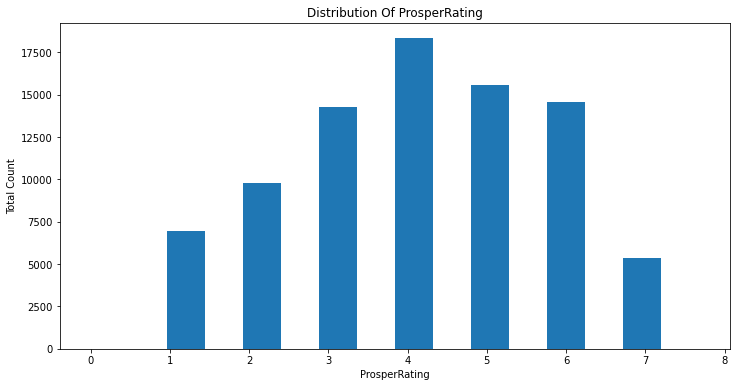

In [509]:
rcParams['figure.figsize'] = 12, 6
bins = np.arange(0, df_subset.ProsperRating.max() + 1, 0.48)
plt.hist(data = df_subset, x = 'ProsperRating', bins = bins)
plt.xlabel('ProsperRating')
plt.ylabel('Total Count')
plt.title('Distribution Of ProsperRating')
plt.grid(False);

The chart displays a bell curve, with the majority of loans originated for borrowers with Prosper ratings between 2 and 6, peaking at a Prosper rating of 4.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
• The highest total count of loans occurred in 2013.
• The BorrowerRate of 0.32 had the highest total counts of loans.
• The LoanOriginalAmount around $3k represented the highest total counts of loans.
• The South Region had the highest total count of loan originations, followed by the West, Midwest, and Northeast regions.
• Homeowners made up 50.4% of borrowers, while non-homeowners accounted for 49.6%.
• The majority of loan originations were for borrowers with a Credit Score Range Upper between 599-699 and 699-799.
• The top five listing categories selected by borrowers were:
        Debt Consolidation
        Not Available
        Other
        Home Improvement
        Business
• There were significant spikes in loan origination counts at $10k, $15k, $20k, $25k, and $35k.
• Most loans were originated for borrowers with Prosper Ratings between 2 and 6, peaking at a rating of 4.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
• I converted the LoanOriginationDate from an object to a Date type and extracted the year for analysis.
• Some variables were converted to categorical types for better clarity.
• I grouped BorrowerState into regions to simplify analysis.
• There are six records with a BorrowerRate greater than 0.4, which I deemed acceptable, so no cleanup was necessary.
• I will create buckets for the CreditScoreRangeUpper to facilitate analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# Numeric Variables Observation

## Using Heatmap to see overall all numeric variables

In [510]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  category      
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
 12  cr

In [511]:
num_var = ['BorrowerRate', 'ProsperRating', 'CreditScoreRangeUpper', 'LoanOriginalAmount']
cat_var = ['IsBorrowerHomeowner', 'ListingCategory', 'Region', 'creditscorerangeup_bin', ]

C:\Users\ngoct\AppData\Local\Temp\ipykernel_5156\2054656145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_subset.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


Text(0.5, 1.0, 'Heatmap of BorrowerRate, ProsperRating, CreditScoreRangeUpper,& LoanOriginalAmount  ')

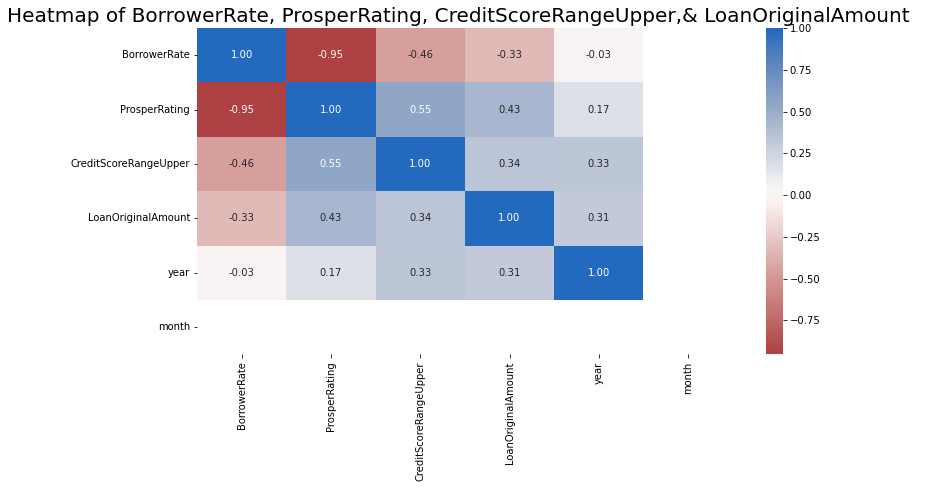

In [512]:
sb.heatmap(df_subset.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("Heatmap of BorrowerRate, ProsperRating, CreditScoreRangeUpper,& LoanOriginalAmount  ", fontsize =20)

From the heat map, we can observe the following correlations:

Borrower Rate has the strongest negative correlation with Prosper Rating (-0.95), followed by Credit Score Upper Range (-0.46) and Loan Original Amount (-0.33). This makes sense, as a lower Prosper Rating corresponds to a higher Borrower Rate. Similarly, a higher Credit Score Upper Range typically indicates lower risk, leading to lower Borrower Rates for larger loan amounts.

Prosper Rating has the highest negative correlation with Borrower Rate, while positively correlating with Credit Score Upper Range and Loan Original Amount, which aligns with the previous observations.

Overall, three correlation values stand out: -0.95 (Borrower Rate and Prosper Rating), 0.55 (Prosper Rating and Credit Score Upper Range), and 0.43 (Prosper Rating and Loan Original Amount).

## Scatter plot showing a negative correlation between two variables

Text(0.5, 0.98, 'Scatter plot showing a negative correlation between two variables!')

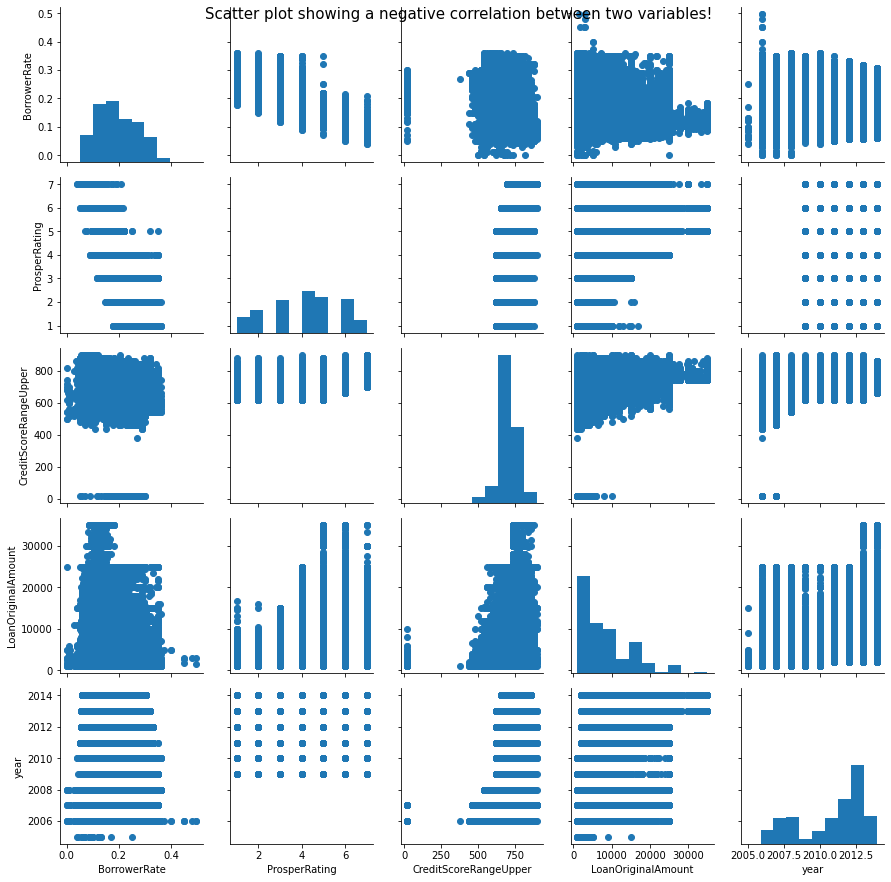

In [513]:
g = sb.PairGrid(data = df_subset, vars = ['BorrowerRate', 'ProsperRating', 'CreditScoreRangeUpper','LoanOriginalAmount','year'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.fig.suptitle('Scatter plot showing a negative correlation between two variables!',  fontsize =15)


Borrower Rate vs. Loan Origination Amount
Most Loan Origination Amounts range from $0 to $25k, with Borrower Rates between 0 and 0.35. A few loans have Borrower Rates exceeding 0.35, with Loan Origination Amounts around $5k.

Borrower Rate vs. Credit Score Upper Range
The majority of loans have a Credit Score Upper Range from around 420 to over 800. There is one loan with a Credit Score Upper Range of 400, and some loans show Credit Score Upper Ranges near 0, which may indicate missing data or borrower non-disclosure. Most of these loans have Borrower Rates below 0.35.

Borrower Rate vs. Prosper Rating
It is clear that higher Prosper Ratings correlate with lower Borrower Rates. From 2005 to 2014, the range of Borrower Rates has generally decreased.

## Deep dive in each pairs. Let's examine negative correlation of 2 numeric variables

In [514]:
 # Function to create reg plot
def reggrid(x, y,**kwargs):
    ax = sb.regplot(x=x, y=y, color='b')               
    ax.tick_params(rotation=90)    

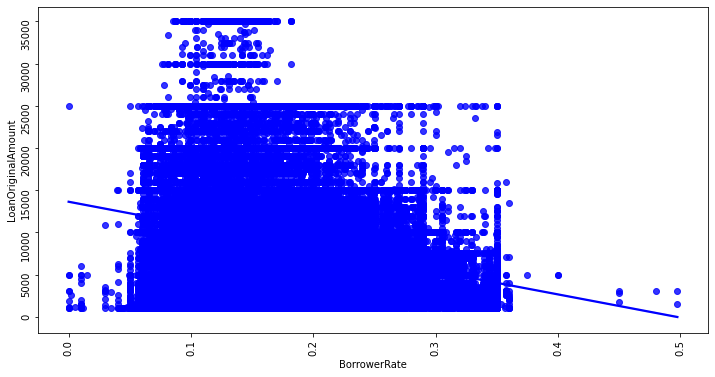

In [515]:
reggrid (df_subset['BorrowerRate'],df_subset['LoanOriginalAmount'])


Higher Loan Origination Amounts correlate with lower Borrower Rates.

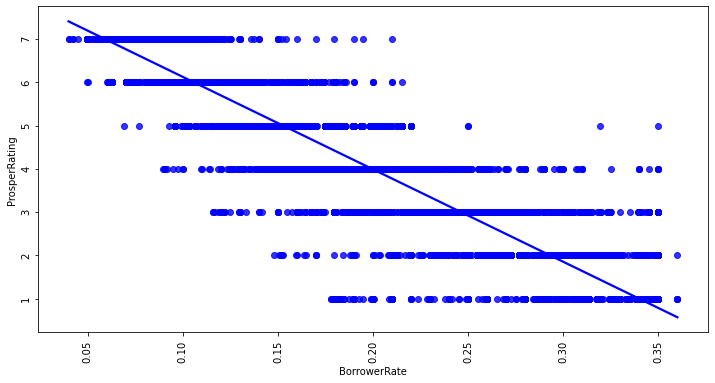

In [516]:
reggrid (df_subset['BorrowerRate'],df_subset['ProsperRating'])

Higher Prosper Ratings correlate with lower Borrower Rates.

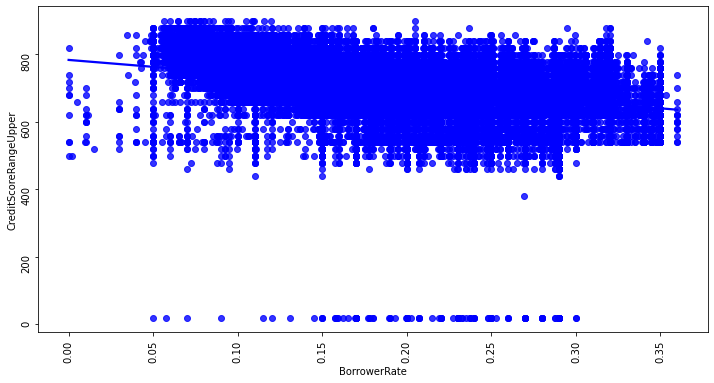

In [517]:
reggrid (df_subset['BorrowerRate'],df_subset['CreditScoreRangeUpper'])

Higher Credit Score Upper Ranges correlate with lower Borrower Rates.

## Deep dive in each pairs. Let's examine positive correlation of 2 numeric variable

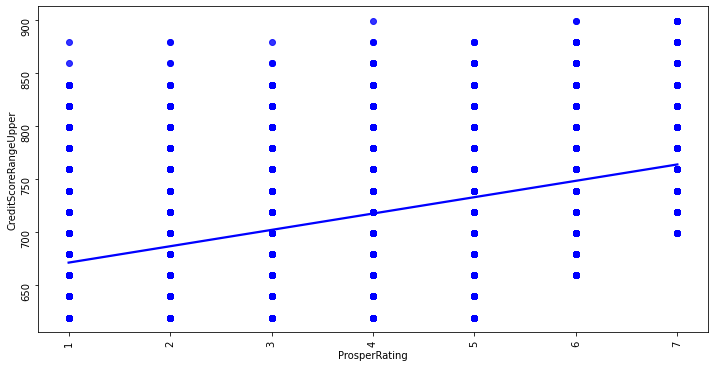

In [518]:
reggrid (df_subset['ProsperRating'],df_subset['CreditScoreRangeUpper'])

Higher Prosper Ratings correlate with higher Credit Score Upper Ranges.

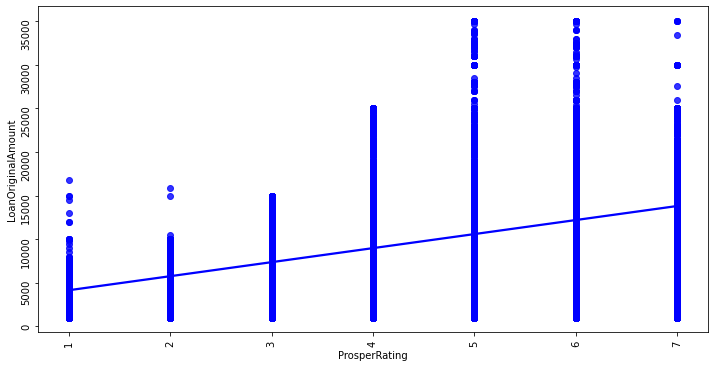

In [519]:
reggrid (df_subset['ProsperRating'],df_subset['LoanOriginalAmount'])

Higher Prosper Ratings correlate with a wider range of Loan Origination Amounts.

## Numeric Variables vs. Categorical Variables (Quantitative vs. Qualitative)


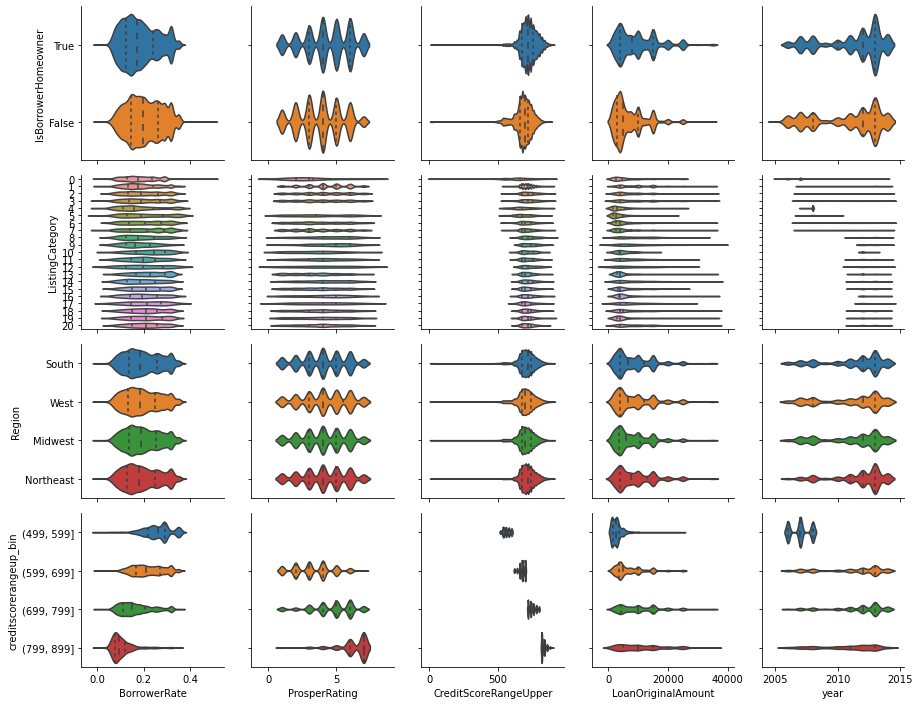

In [520]:
g = sb.PairGrid(data = df_subset, x_vars = ['BorrowerRate', 'ProsperRating', 'CreditScoreRangeUpper', 'LoanOriginalAmount','year'],
                y_vars = ['IsBorrowerHomeowner', 'ListingCategory', 'Region', 'creditscorerangeup_bin', ])
g.map(sb.violinplot, inner = 'quartile')


Borrower Rate vs. Credit Score Upper Range Bin
The Credit Score Upper Range Bin (799-899) has a mean Borrower Rate of around 0.1.
The (699-799) bin has a mean Borrower Rate of approximately 0.18.
The (599-699) bin also has a mean Borrower Rate of around 0.21.
The (499-599) bin shows a mean Borrower Rate of about 0.28 to 0.3.

Borrower Rate vs. Region
All regions exhibit a mean Borrower Rate of less than 0.2.

Borrower Rate vs. Listing Category
The chart shows few insights, with some outliers having a listing category of 0 (Not Available) associated with high Borrower Rates.

Borrower Rate vs. Is Borrower Homeowner
The mean Borrower Rate for homeowners (True) is slightly lower than for non-homeowners (False). However, there are some outliers in the False category with high Borrower Rates.

Loan Origination Amount vs. Credit Score Upper Range Bin
The (799-899) bin has Loan Origination Amounts across the entire range, with most being less than $18k.
The (699-799) bin includes Loan Origination Amounts across a similar range, but both minimum and maximum values are lower than in the (799-899) bin, with most under $17k or $16k.
The (599-699) bin shows a shorter range of Loan Origination Amounts, with a mean around $5k and a majority under $15k, maxing out at around $27k-$28k.
The (499-599) bin primarily has Loan Origination Amounts below $5k, with some outliers between $5k and $30k. This bin has the smallest range overall.

In summary, higher Credit Score Upper Ranges correlate with a wider range of Loan Origination Amounts, while lower ranges correlate with a shorter range.

Credit Score Upper Range vs. Listing Category
Most listing categories have a Credit Score Upper Range above 500, except for those classified as 0 (Not Available), which show lower Credit Scores.

Credit Score Upper Range vs. Is Borrower Homeowner
The tail for non-homeowners (False) displays lower Credit Score Upper Ranges compared to homeowners (True).

Trends Over Time
The low Credit Score Range (499-599) was only observed from 2005 to 2008.

### Box plot for plotting a Quantitative variable  versus Qualitative variable 

In [521]:
 #use function Function to create box plot
import seaborn as sb
def boxgrid( x, y, **kwargs):
# Quick hack for creating box plots with seaborn's PairGrid. 
    ax = sb.boxplot(x=x, y=y, color='b')               
    ax.tick_params(rotation=90)    

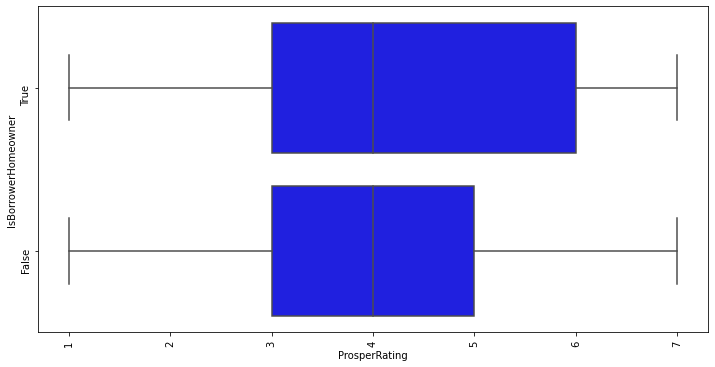

In [522]:
   boxgrid (df_subset['ProsperRating'], df_subset['IsBorrowerHomeowner'])

The median Prosper Rating for borrowers who are not homeowners (IsBorrowerHomeOwner = False) is equal to the median Borrower Rate for those who are homeowners (IsBorrowerHomeOwner = True). However, in the Q3 range, the "True" category shows a wider range of Prosper Ratings compared to the "False" category.

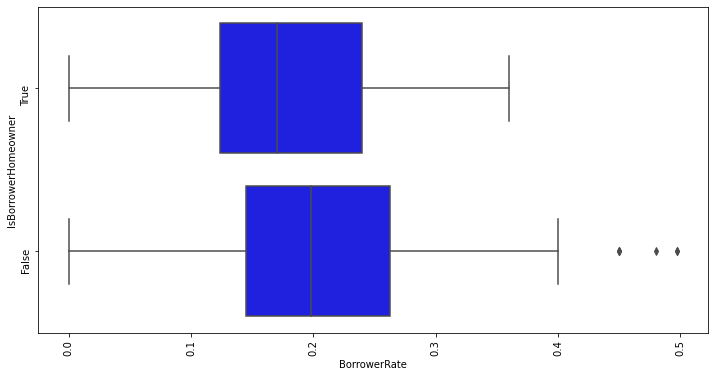

In [523]:
   boxgrid (df_subset['BorrowerRate'], df_subset['IsBorrowerHomeowner'])

The median Borrower Rate for borrowers who are not homeowners (IsBorrowerHomeOwner = False) is higher than that for homeowners (IsBorrowerHomeOwner = True), with values of 0.2 and 0.17, respectively.

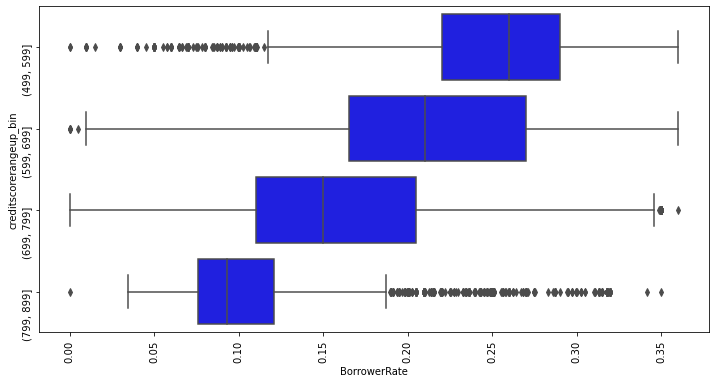

In [524]:
   boxgrid (df_subset['BorrowerRate'], df_subset['creditscorerangeup_bin'])

The median Borrower Rate increases as the Credit Score Upper Range decreases.decreases

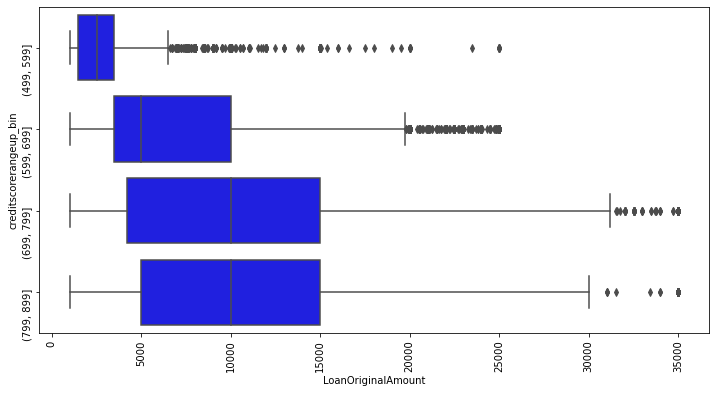

In [525]:
   boxgrid (df_subset['LoanOriginalAmount'], df_subset['creditscorerangeup_bin'])

The median Loan Origination Amount increases as the Credit Score Upper Range increases.

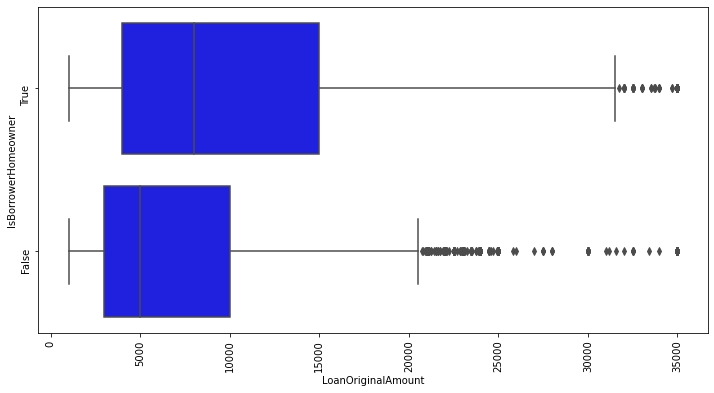

In [526]:
    boxgrid (df_subset['LoanOriginalAmount'], df_subset['IsBorrowerHomeowner'])

The median Loan Origination Amount for borrowers who are homeowners (IsBorrowerHomeOwner = True) is higher than that for non-homeowners (IsBorrowerHomeOwner = False).

## Plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable

Text(0.5, 1.0, 'Average of BorrowerRate based on CreditScoreRangeUpper')

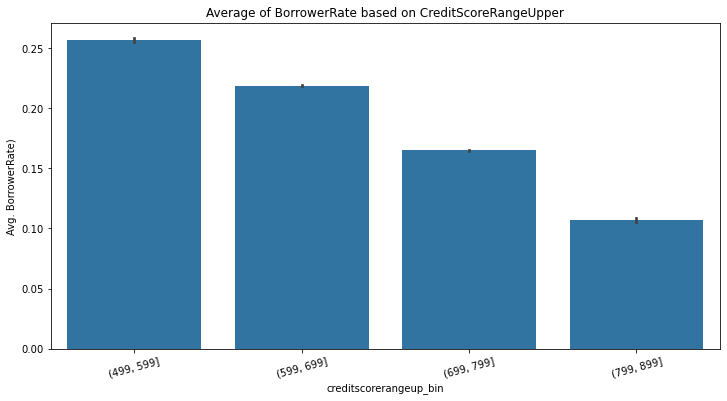

In [527]:
base_color = sb.color_palette()[0]
sb.barplot(data=df_subset, x='creditscorerangeup_bin', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. BorrowerRate)')
plt.title('Average of BorrowerRate based on CreditScoreRangeUpper')

Borrower Rate is negatively correlated with Credit Score Upper Range; as the Credit Score Upper Range decreases, the average Borrower Rate increases.

Text(0.5, 1.0, 'Average of LoanOriginalAmount based on IsBorrowerHomeOwner')

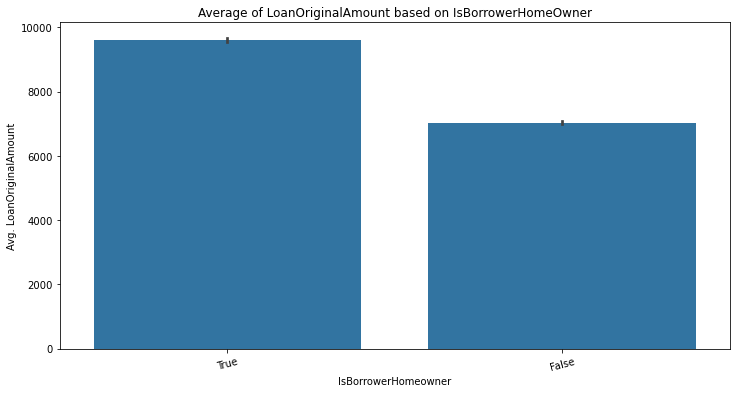

In [528]:
base_color = sb.color_palette()[0]
sb.barplot(data=df_subset, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. LoanOriginalAmount')
plt.title('Average of LoanOriginalAmount based on IsBorrowerHomeOwner')

The average Loan Origination Amount for borrowers who are homeowners (IsBorrowerHomeOwner = Yes) is higher than for non-homeowners (IsBorrowerHomeOwner = No), with values of 9.5k and 6.5k, respectively.

## I want to see the average BorrowerRate by year of LoanOriginationDate.

In [529]:
#convert date column to datetime and subtract one week
df_subset['LoanOriginationDate'] = pd.to_datetime(df_subset['LoanOriginationDate'])
#calculate Count of NLOR, grouped by quarter
group_avg=df_subset.groupby(df_subset['LoanOriginationDate'].dt.to_period('Y'))['BorrowerRate'].mean()
print(group_avg)

LoanOriginationDate
2005    0.093702
2006    0.191384
2007    0.176583
2008    0.186136
2009    0.192922
2010    0.212778
2011    0.229982
2012    0.220027
2013    0.183535
2014    0.153733
Freq: A-DEC, Name: BorrowerRate, dtype: float64


In [530]:
group_avg = group_avg.reset_index(name='average')

In [531]:
group_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   LoanOriginationDate  10 non-null     period[A-DEC]
 1   average              10 non-null     float64      
dtypes: float64(1), period[A-DEC](1)
memory usage: 288.0 bytes


Text(0.5, 1.0, 'Average of BorrowerRate based on LoanOriginationDate by Year')

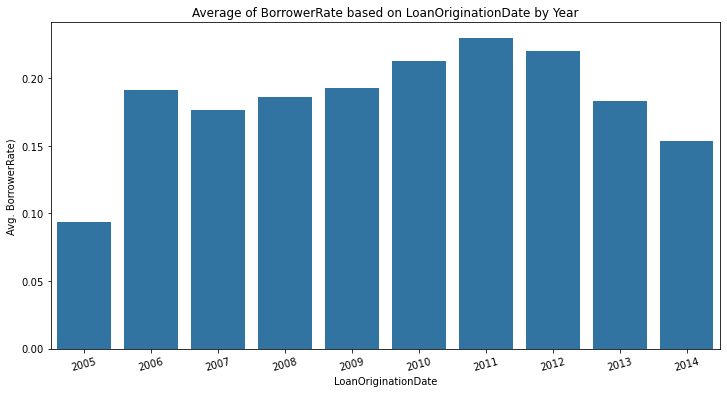

In [532]:
base_color = sb.color_palette()[0]
sb.barplot(data=group_avg, x='LoanOriginationDate', y='average', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. BorrowerRate)')
plt.title('Average of BorrowerRate based on LoanOriginationDate by Year')

The chart shows that the average Borrower Rate reached its highest point in 2011 and its lowest point in 2005.

### Analysis of Borrower Rate in 2011
The average Borrower Rate in 2011 is the highest, which may indicate that a larger proportion of higher-risk borrowers were seeking loans that year. To better understand this trend, I will analyze the Prosper Ratings for borrowers in 2011 compared to other years. This will help determine if there was a correlation between lower Prosper Ratings and higher Borrower Rates during that period.

LoanOriginationDate
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009    4.285931
2010    3.836888
2011    3.552280
2012    3.688130
2013    4.257825
2014    4.718452
Freq: A-DEC, Name: ProsperRating, dtype: float64


Text(0.5, 1.0, 'Average of ProsperRating based on LoanOriginationDate by Year')

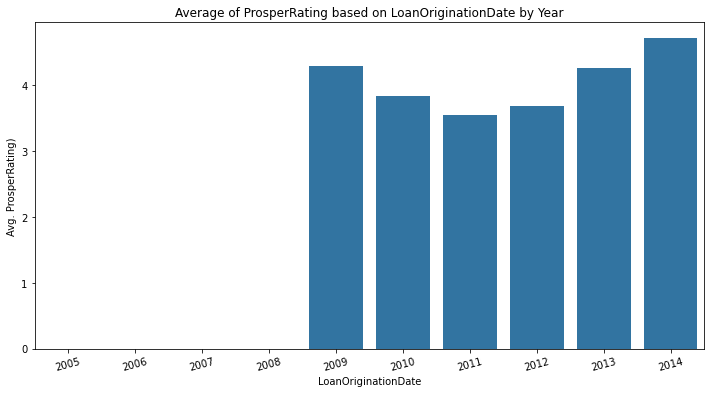

In [533]:
#convert date column to datetime and subtract one week
df_subset['LoanOriginationDate'] = pd.to_datetime(df_subset['LoanOriginationDate'])
#calculate Avg of ProsperRating, grouped by Year
group_avg1=df_subset.groupby(df_subset['LoanOriginationDate'].dt.to_period('Y'))['ProsperRating'].mean()
print(group_avg1)
group_avg1 = group_avg1.reset_index(name='average')
base_color = sb.color_palette()[0]
sb.barplot(data=group_avg1, x='LoanOriginationDate', y='average', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. ProsperRating)')
plt.title('Average of ProsperRating based on LoanOriginationDate by Year')

The chart supports the assumption that the highest average Borrower Rate in 2011 coincides with the lowest average Prosper Rating, around 3.5. Additionally, the average Prosper Rating in 2014 is the highest, which aligns with the second lowest average Borrower Rate observed in the previous chart.

This demonstrates that, generally, a higher average Prosper Rating correlates with a lower average Borrower Rate, and vice versa.

# Categorical Variables
Lastly, we will look at the relationship between each categorical variables.

In [534]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BorrowerRate              113937 non-null  float64       
 1   ProsperRating             84853 non-null   float64       
 2   BorrowerState             108422 non-null  object        
 3   IsBorrowerHomeowner       113937 non-null  category      
 4   CreditScoreRangeUpper     113346 non-null  float64       
 5   LoanOriginalAmount        113937 non-null  int64         
 6   LoanOriginationDate       113937 non-null  datetime64[ns]
 7   ListingCategory           113937 non-null  category      
 8   Region                    108040 non-null  category      
 9   year_LoanOriginationDate  113937 non-null  datetime64[ns]
 10  year                      113937 non-null  int64         
 11  month                     113937 non-null  int64         
 12  cr

## Plot the bar chart for 2 qualitative variables

[Text(0.5, 1.0, 'Total Count of Loans grouped by Region based on CrediScoreRangeUpper')]

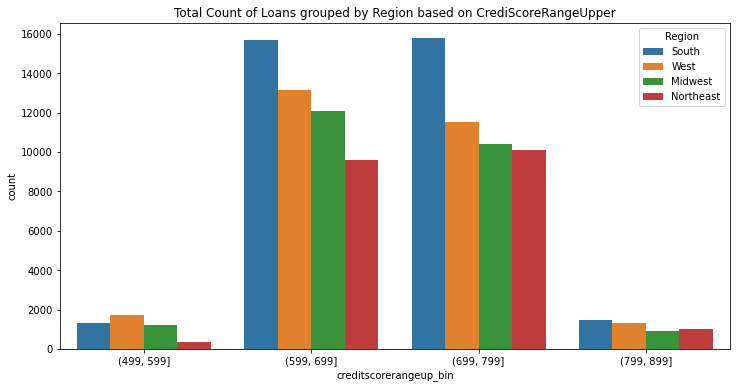

In [535]:
sb.countplot(data = df_subset, x = 'creditscorerangeup_bin', hue = 'Region').set( title = 'Total Count of Loans grouped by Region based on CrediScoreRangeUpper')

It's interesting to note that the Credit Score Upper Range for the two buckets (599-699 and 699-799) shows the same trend, with total counts of loans decreasing from South to West, then Midwest, and finally Northeast. Most loans originated fall within these two Credit Score Upper Range buckets, highlighting a regional preference in lending patterns.

[Text(0.5, 1.0, 'Total Count of Loans grouped by IsHomeBorrowerHomeOwner based on CrediScoreRangeUpper')]

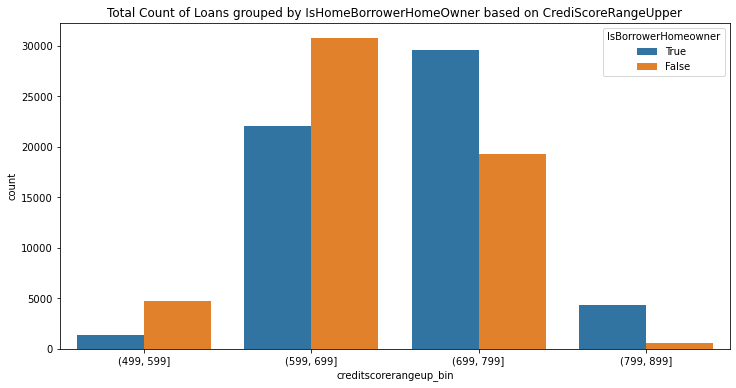

In [536]:
sb.countplot(data = df_subset, x = 'creditscorerangeup_bin', hue = 'IsBorrowerHomeowner').set( title = 'Total Count of Loans grouped by IsHomeBorrowerHomeOwner based on CrediScoreRangeUpper')

There are more loans for borrowers who are homeowners (IsBorrowerHomeOwner = True) compared to those who are not (IsBorrowerHomeOwner = False) in the Credit Score Upper Range buckets of (699-799) and (799-899). Conversely, there are fewer loans for homeowners compared to non-homeowners in the lower Credit Score Upper Range buckets of (499-599) and (599-699).

[Text(0.5, 1.0, 'Total Count of Loans grouped by ListingCategory based on CrediScoreRangeUpper')]

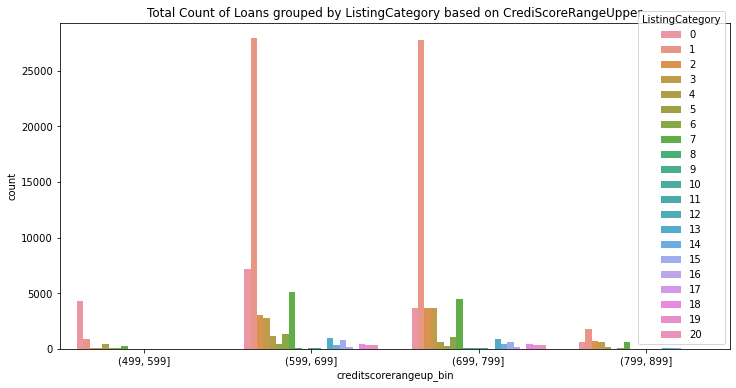

In [537]:
sb.countplot(data = df_subset, x = 'creditscorerangeup_bin', hue = 'ListingCategory').set( title = 'Total Count of Loans grouped by ListingCategory based on CrediScoreRangeUpper')

It appears that the total counts of loans categorized under "Debt Consolidation" (ListingCategory = 1) are equal for both Credit Score Range Upper buckets of (599-699) and (699-799). This suggests that borrowers in these two credit score ranges have a similar demand for debt consolidation loans, indicating a consistent trend in borrowing behavior for this purpose across different credit score profiles.

[Text(0.5, 1.0, 'Total Count of Loans grouped by ListingCategory based on IsBorrowerHomeOwner')]

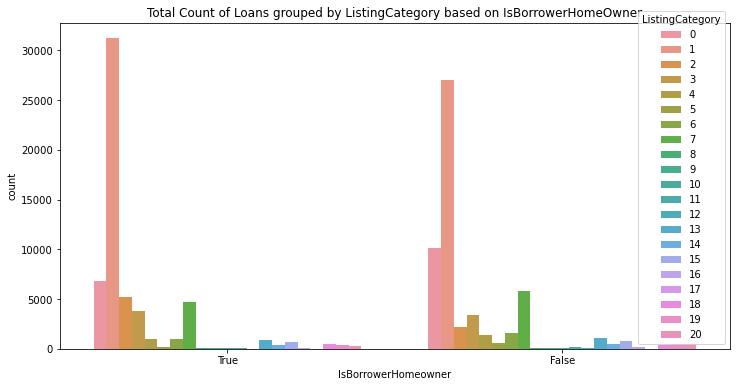

In [538]:
sb.countplot(data = df_subset, x = 'IsBorrowerHomeowner', hue = 'ListingCategory').set( title = 'Total Count of Loans grouped by ListingCategory based on IsBorrowerHomeOwner')

The observation that loans categorized as "Debt Consolidation" (ListingCategory = 1) are higher for borrowers who are homeowners (IsBorrowerHomeOwner = True) compared to those who are not homeowners (IsBorrowerHomeOwner = False) suggests that homeowners may be more likely to seek debt consolidation options. This could be due to various factors, such as homeowners having more equity in their property or being more motivated to consolidate debts to improve their financial stability.

[Text(0.5, 1.0, 'Total Count of Loans grouped by Region based on IsBorrowerHomeOwner')]

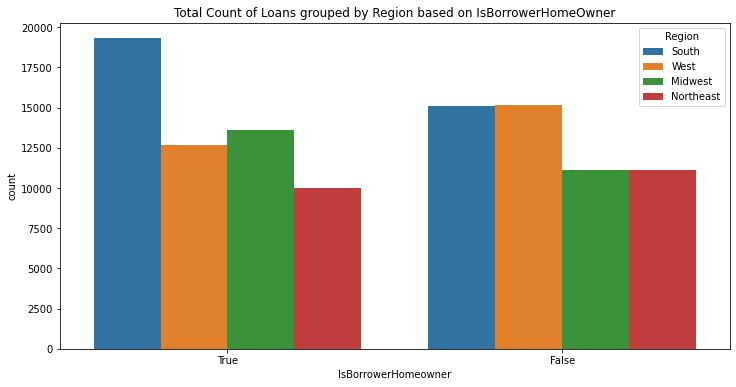

In [539]:
sb.countplot(data = df_subset, x = 'IsBorrowerHomeowner', hue = 'Region').set( title = 'Total Count of Loans grouped by Region based on IsBorrowerHomeOwner')

The findings indicate a clear regional preference for loan origination based on borrower homeownership status:

Homeowners (IsBorrowerHomeOwner = True): The South region shows the highest total counts of loan origination, suggesting that homeowners in this region are more likely to take out loans, possibly due to factors such as greater access to credit, property equity, or regional economic conditions.

Non-Homeowners (IsBorrowerHomeOwner = False): For non-homeowners, both the South and West regions have similar and higher total counts of loan origination compared to the Midwest and Northeast. This could indicate that non-homeowners in these regions are also actively seeking loans, potentially for reasons like personal loans or other financial needs that don't require home equity.

These patterns may reflect regional economic conditions, demographic factors, or differences in borrowing behavior between homeowners and non-homeowners.


## Plot on the Heatmap

In [540]:
ct_counts = df_subset.groupby(['creditscorerangeup_bin', 'Region']).size()
print(ct_counts)

creditscorerangeup_bin  Region   
(499, 599]              South         1314
                        West          1733
                        Midwest       1236
                        Northeast      354
(599, 699]              South        15686
                        West         13120
                        Midwest      12064
                        Northeast     9614
(699, 799]              South        15772
                        West         11526
                        Midwest      10414
                        Northeast    10083
(799, 899]              South         1450
                        West          1325
                        Midwest        913
                        Northeast     1008
dtype: int64


In [541]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

In [542]:
ct_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   creditscorerangeup_bin  16 non-null     category
 1   Region                  16 non-null     category
 2   count                   16 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 728.0 bytes


Text(0.5, 1.0, 'Heatmap Total Count of Loans based on CreditScoreRangeUpper & Region')

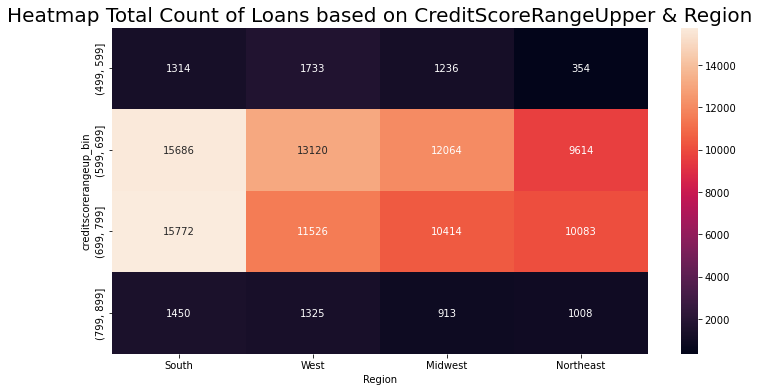

In [543]:
ct_counts = ct_counts.pivot(index = 'creditscorerangeup_bin', columns = 'Region', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd')
plt.title("Heatmap Total Count of Loans based on CreditScoreRangeUpper & Region", fontsize =20)

Based on the heatmap, we can see there are around 7k total count of loan origination at the highest CreditScoreRangeupper (799,899) and the lowest CreditScoreRangeupper (499,599)

At the South region, there are around 30k total count of loans originated at 2 CreditScoreRangeupper (599,699 and 699,799)

In this investigation, several intriguing relationships emerged between the features of interest, particularly focusing on BorrowerRate, ProsperRating, CreditScoreRangeUpper, and LoanOriginalAmount. Here’s a detailed breakdown of these relationships:

Correlation Analysis

    1. Negative Correlations:

        BorrowerRate and ProsperRating: There is a strong negative correlation of -0.95, indicating that as ProsperRating increases, BorrowerRate significantly decreases. This           relationship makes sense, as lower ProsperRatings typically indicate higher risk borrowers who are charged higher rates.
    
        BorrowerRate and CreditScoreRangeUpper: A moderate negative correlation of -0.46 suggests that higher credit scores lead to lower BorrowerRates, reinforcing the idea            that creditworthiness affects borrowing costs.
    
        BorrowerRate and LoanOriginalAmount: The correlation of -0.33 indicates that larger loans tend to come with lower BorrowerRates, possibly due to lower risk associated           with larger, secured loans.
    
    2. Positive Correlations:
    
        ProsperRating and CreditScoreRangeUpper: A positive correlation indicates that higher ProsperRatings are associated with higher credit scores. This relationship shows           that better-rated borrowers tend to have better credit profiles.
        
        ProsperRating and LoanOriginalAmount: The positive correlation implies that higher ProsperRatings correspond to a wider range of loan amounts, indicating that better-           rated borrowers have access to larger loans.
    
Violin Plots

    BorrowerRate vs. CreditScoreRangeUpper Bin: The mean BorrowerRate varies significantly across credit score bins, with lower scores resulting in higher rates. For instance,       borrowers in the 799-899 range have an average rate of around 0.1, while those in the 499-599 range see rates around 0.28-0.30. This illustrates how riskier borrowers face       steeper costs.
    
Box Plots

    Median BorrowerRate by Homeownership Status: The median BorrowerRate for non-homeowners (0.20) is higher than for homeowners (0.17), indicating that homeowners tend to           secure loans at lower rates, possibly due to perceived stability or equity.
    
    CreditScoreUpperRange Impact: The analysis shows that as CreditScoreUpperRange increases, median BorrowerRate decreases, which is consistent with previous observations about     risk and creditworthiness.
    
    LoanOriginalAmount Variations: The median LoanOriginalAmount increases with higher CreditScoreUpperRange, suggesting that borrowers with better credit scores are able to         secure larger loans. Additionally, the median LoanOriginalAmount is higher for homeowners, highlighting the role of home equity in borrowing.
    
Bar Charts

    BorrowerRate Trends Over Time: The average BorrowerRate peaked in 2011 and dropped to its lowest in 2015. This aligns with the trends in ProsperRating, where lower ratings       in 2011 correlated with higher rates. Conversely, the average ProsperRating in 2014 was at its highest, coinciding with the second lowest BorrowerRate.
    
    Homeownership vs. Loan Amount: On average, homeowners have higher LoanOriginalAmounts (9.5k) compared to non-homeowners (6.5k), illustrating that homeownership status           affects borrowing capacity.
    
Regional Trends

    Geographic Distribution of Loans: The analysis reveals that loan origination counts for the CreditScoreRangeUpper buckets of (599-699 and 699-799) decrease consistently from     South to Northeast. This trend indicates a geographical influence on credit scores and borrowing behavior, with Southern borrowers having more loans in these categories         compared to other regions.
    
Observations on Other Features

    CreditScoreRangeUpper and Region: The same trend observed for loan counts in the two credit score buckets also reflects in their regional distributions. Higher loan             origination counts in the South for these credit score ranges suggest regional differences in borrower profiles and lending practices.

In conclusion, these relationships illustrate the complex interplay between borrower characteristics, loan amounts, and creditworthiness, revealing insights into lending behaviors, risk assessment, and regional differences in borrowing practices.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Plotting for 'BorrowerRate and Loan Origination Amount by ProsperRating'

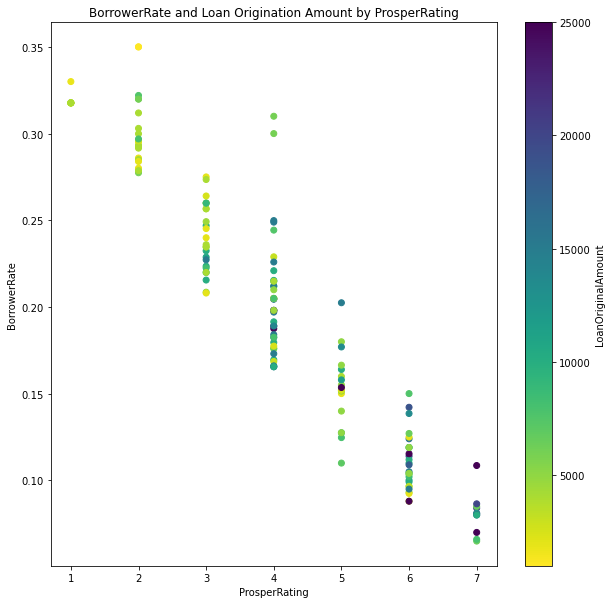

In [545]:
# loading in the data, sampling to reduce points plotted
fuel_econ = df_subset

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [10,10])
plt.scatter(data = fuel_econ_subset, x = 'ProsperRating', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.title('BorrowerRate and Loan Origination Amount by ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerRate')
plt.colorbar(label = 'LoanOriginalAmount');


The analysis of LoanOriginationAmount in relation to ProsperRating reveals several key trends regarding borrower behavior and loan characteristics. Here's a detailed breakdown of these observations:

Key Observations
Loan Origination Amount by ProsperRating:

The chart indicates that the largest LoanOriginationAmounts are concentrated at ProsperRating 4 and above. This suggests that borrowers with higher ProsperRatings tend to secure larger loans, reflecting their creditworthiness and perceived ability to repay.
Borrower Rate Trends:

As ProsperRating increases, the Borrower Rate tends to decrease. This relationship highlights that borrowers with higher ratings not only qualify for larger loans but also benefit from lower interest rates. This trend underscores the inverse relationship between credit quality (as measured by ProsperRating) and borrowing costs.
Low ProsperRating Characteristics:

In the lower ProsperRating range (1 to 2), there is a noticeable scarcity of loans, with those that do exist having relatively small balances (typically less than $5,000). However, these loans come with significantly high Borrower Rates, indicating that borrowers in this category are considered high risk. The combination of low loan amounts and high rates reflects the lenders’ caution in dealing with such borrowers.
Midpoint Analysis at ProsperRating = 4:

The ProsperRating of 4 serves as a pivotal point in this analysis. It shows the highest volume of loans, with Borrower Rates predominantly ranging between 0.17 and 0.25. This indicates that borrowers with this rating level are more common in the loan pool and still benefit from relatively competitive interest rates.
The presence of only two outliers with Borrower Rates exceeding 0.30 suggests that while most loans are concentrated in a favorable range, there are exceptions that warrant further investigation into the factors affecting these high rates.

Conclusion
Overall, the relationship between LoanOriginationAmount, ProsperRating, and BorrowerRate reveals important insights into borrower dynamics. Higher ProsperRatings are associated with larger loans and lower rates, while lower ratings correlate with smaller loans and higher rates. The concentration of loans at ProsperRating = 4 suggests it is a key threshold for both lenders and borrowers, balancing loan size and interest costs effectively. This analysis provides valuable context for understanding lending practices and borrower risk profiles within the dataset.

## Plotting for 'BorrowerRate and Loan Origination Amount by Origination Year'

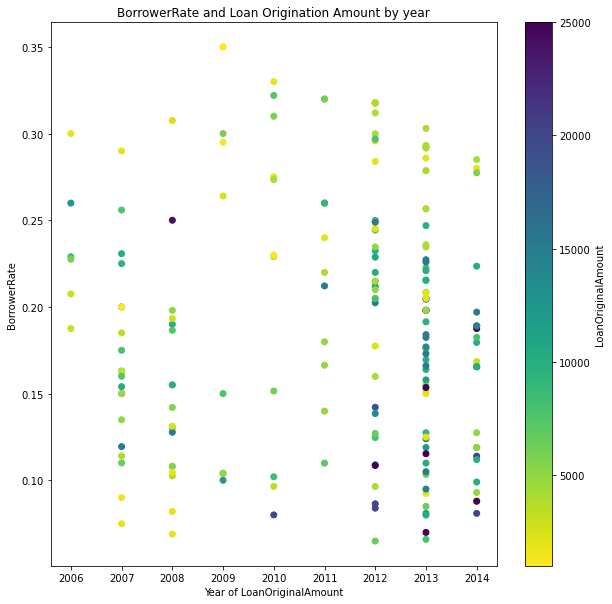

In [546]:
# loading in the data, sampling to reduce points plotted
fuel_econ = df_subset

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [10,10])
plt.scatter(data = fuel_econ_subset, x = 'year', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.title('BorrowerRate and Loan Origination Amount by year')
plt.xlabel('Year of LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.colorbar(label = 'LoanOriginalAmount');


Analysis of Loan Origination Trends Over the Years

2006: Limited Loan Origination

In 2006, the data shows a notably low volume of loan origination. The minimum BorrowerRate during this year was significantly high compared to subsequent years. This suggests that lenders were perhaps more risk-averse, leading to fewer loans being issued, and those that were issued came with higher interest rates, reflecting the perceived risk of the borrowers at that time.

2009: Impact of the Recession

The lack of loan origination in 2009 is likely attributable to the financial crisis and subsequent recession. Economic instability generally leads to tighter lending standards, reducing the number of loans issued. Borrowers during this period may have faced greater scrutiny, which can also explain higher BorrowerRates as lenders adjust to increased risk and uncertainty.

2012 and 2013: Peak Loan Origination

The years 2012 and 2013 marked a significant increase in loan origination, indicating a recovery in the lending market. The BorrowerRate during these years showed a wide range, suggesting a diverse pool of borrowers with varying credit profiles.
The broader range of BorrowerRates implies that while many loans were being issued at competitive rates, there were also higher-risk loans that contributed to elevated rates. This diversity in loan characteristics reflects a more dynamic market environment as recovery took hold.

Conclusion
The trends observed in loan origination from 2006 to 2013 highlight the impact of broader economic conditions on lending practices. The low origination rates in 2006 and 2009 underscore the challenges posed by economic uncertainty and the consequent conservative lending approaches. In contrast, the spike in loan origination in 2012 and 2013 signifies a market rebound, though the wide range of BorrowerRates indicates ongoing variability in borrower risk profiles. This historical context is crucial for understanding how economic factors influence lending behavior and borrower access to credit.

## Faceting for Multivariate Data

## Want to examine BorrowerRate/LoanOriginalAmount/Region/CreditScoreUpper

C:\Users\ngoct\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


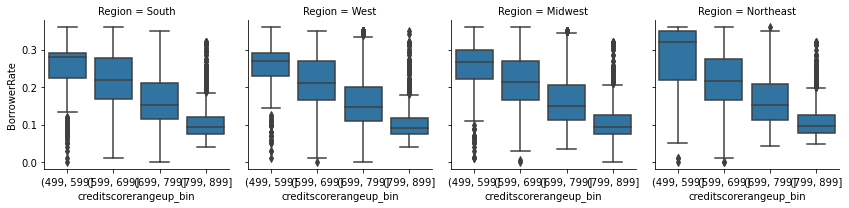

In [547]:
g = sb.FacetGrid(data = df_subset, col = 'Region')
g.map(sb.boxplot, 'creditscorerangeup_bin', 'BorrowerRate')


Observations on BorrowerRate and CreditScoreUpperRange Across Regions

Consistent Trends Across Regions:
Throughout all regions analyzed, a clear pattern emerges: the lower the CreditScoreUpperRange, the higher the BorrowerRate, and conversely, the higher the CreditScoreUpperRange, the lower the BorrowerRate. This relationship suggests a strong correlation between creditworthiness (as indicated by CreditScoreUpperRange) and the cost of borrowing (BorrowerRate).

Implications for Borrowers:
Borrowers with lower credit scores typically face higher interest rates, reflecting the increased risk perceived by lenders. This trend underscores the importance of maintaining a healthy credit score for borrowers, as it directly impacts their borrowing costs.

Uniformity Across Regions:
The uniformity of this trend across different regions indicates that lending practices may be consistent regardless of geographical differences. This could suggest that lenders are applying similar risk assessment criteria and pricing strategies based on CreditScoreUpperRange, irrespective of regional economic conditions.

Regional Variations in Loan Volume:
While the relationship between CreditScoreUpperRange and BorrowerRate is consistent, regional differences may still exist in the volume of loans issued. For example, regions with higher average credit scores may have a higher volume of loans at lower rates, while regions with lower average credit scores may see fewer loans issued due to the higher costs associated with borrowing.

Conclusion
The observed relationship between CreditScoreUpperRange and BorrowerRate reinforces the notion that credit scores play a crucial role in determining borrowing costs. The consistency of this pattern across various regions highlights the importance of creditworthiness in the lending process and suggests that borrowers can benefit from improving their credit scores to secure better borrowing terms. This insight is valuable for both lenders and borrowers in understanding the dynamics of the lending market.


C:\Users\ngoct\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


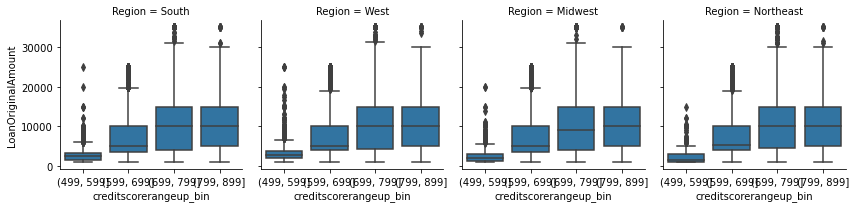

In [548]:
g = sb.FacetGrid(data = df_subset, col = 'Region')
g.map(sb.boxplot, 'creditscorerangeup_bin', 'LoanOriginalAmount')

Observations on Loan Original Amount and Credit Score Upper Range Across Regions

Inverse Relationship:
Across all regions, there is a consistent pattern: the lower the CreditScoreUpperRange, the lower the LoanOriginalAmount that borrowers can secure. Conversely, the higher the CreditScoreUpperRange, the higher the LoanOriginalAmount. This trend indicates that lenders are more likely to offer larger loans to borrowers with better credit scores.

Implications for Borrowers:
Borrowers with lower credit scores may find it challenging to secure substantial loan amounts. This restriction can limit their ability to finance significant expenses, such as home purchases or business investments. Understanding this relationship can help borrowers recognize the importance of improving their credit scores to access larger loan amounts.

Consistency Across Regions:
The uniformity of this relationship across different regions suggests that lending criteria and risk assessments are standardized. Lenders seem to use CreditScoreUpperRange as a key factor in determining loan amounts, reflecting a systematic approach to evaluating credit risk.

Regional Variations:
While the relationship between CreditScoreUpperRange and LoanOriginalAmount is consistent, there may still be regional differences in the overall lending environment. For example, some regions may have higher average loan amounts available due to economic factors, even if the same principles apply.

Impact on Lending Practices:
Lenders are likely to adjust their loan offerings based on the perceived risk associated with a borrower’s credit score. This practice may involve not only the amount lent but also the terms and interest rates attached to the loans.

Conclusion
The observed relationship between CreditScoreUpperRange and LoanOriginalAmount highlights the critical role that credit scores play in the lending process. Borrowers with higher credit scores are more likely to receive larger loans, while those with lower scores face limitations. This insight underscores the importance of maintaining a good credit score for individuals seeking to secure financing for major purchases or investments. Additionally, it points to the need for lenders to adhere to consistent evaluation practices across regions to mitigate risk.

## FacetGrid 2 num and 2 cat

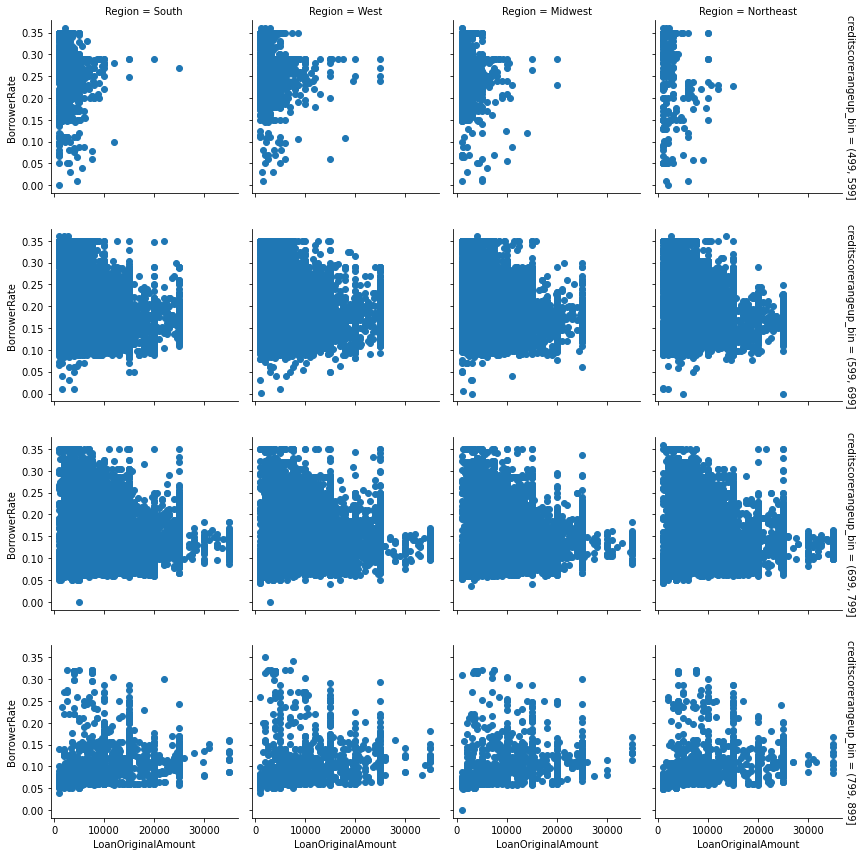

In [549]:
g = sb.FacetGrid(data = df_subset, col = 'Region', row = 'creditscorerangeup_bin', 
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')


Key Observations from the Chart on Credit Score and Loan Origination Amount

1.Impact of Low Credit Score Range:
Low Credit Score, Lower Loan Amount: Across all regions, borrowers with a low CreditScoreUpperRange consistently receive lower LoanOriginalAmounts. This trend highlights how creditworthiness significantly influences borrowing capacity, reinforcing the idea that lenders perceive higher risk in individuals with lower credit scores.

2.Concentration of Loan Origination:
Majority in Two Credit Score Buckets:
The chart reveals that the majority of LoanOriginalAmounts are concentrated in two specific CreditScoreUpperRange buckets: (599, 699) and (699, 799). This indicates that most borrowers fall within these credit score categories, suggesting that they may represent a significant portion of the lending market.

Implications of These Observations

1.Borrower Strategies: Individuals aiming to secure larger loan amounts should focus on improving their credit scores, particularly aiming to transition from the lower credit score brackets to higher ones.

2.Lender Considerations: Lenders may want to tailor their offerings and marketing strategies to target borrowers within these prominent credit score ranges, as they comprise the bulk of loan origination activity.

3.Market Dynamics: The concentration of loans in these two credit score brackets could impact overall lending practices and policies, leading to potential adjustments in how lenders assess risk and set loan amounts.

Conclusion
These observations emphasize the critical role that credit scores play in determining loan amounts and highlight significant patterns in borrower behavior and lender practices. Understanding these dynamics can help both borrowers and lenders navigate the lending landscape more effectively.


## FacetGrid 2 numerics (LoanOriginalAmount, BorrowerRate) and 2 categories (year, CreditScoreRangeUpper)

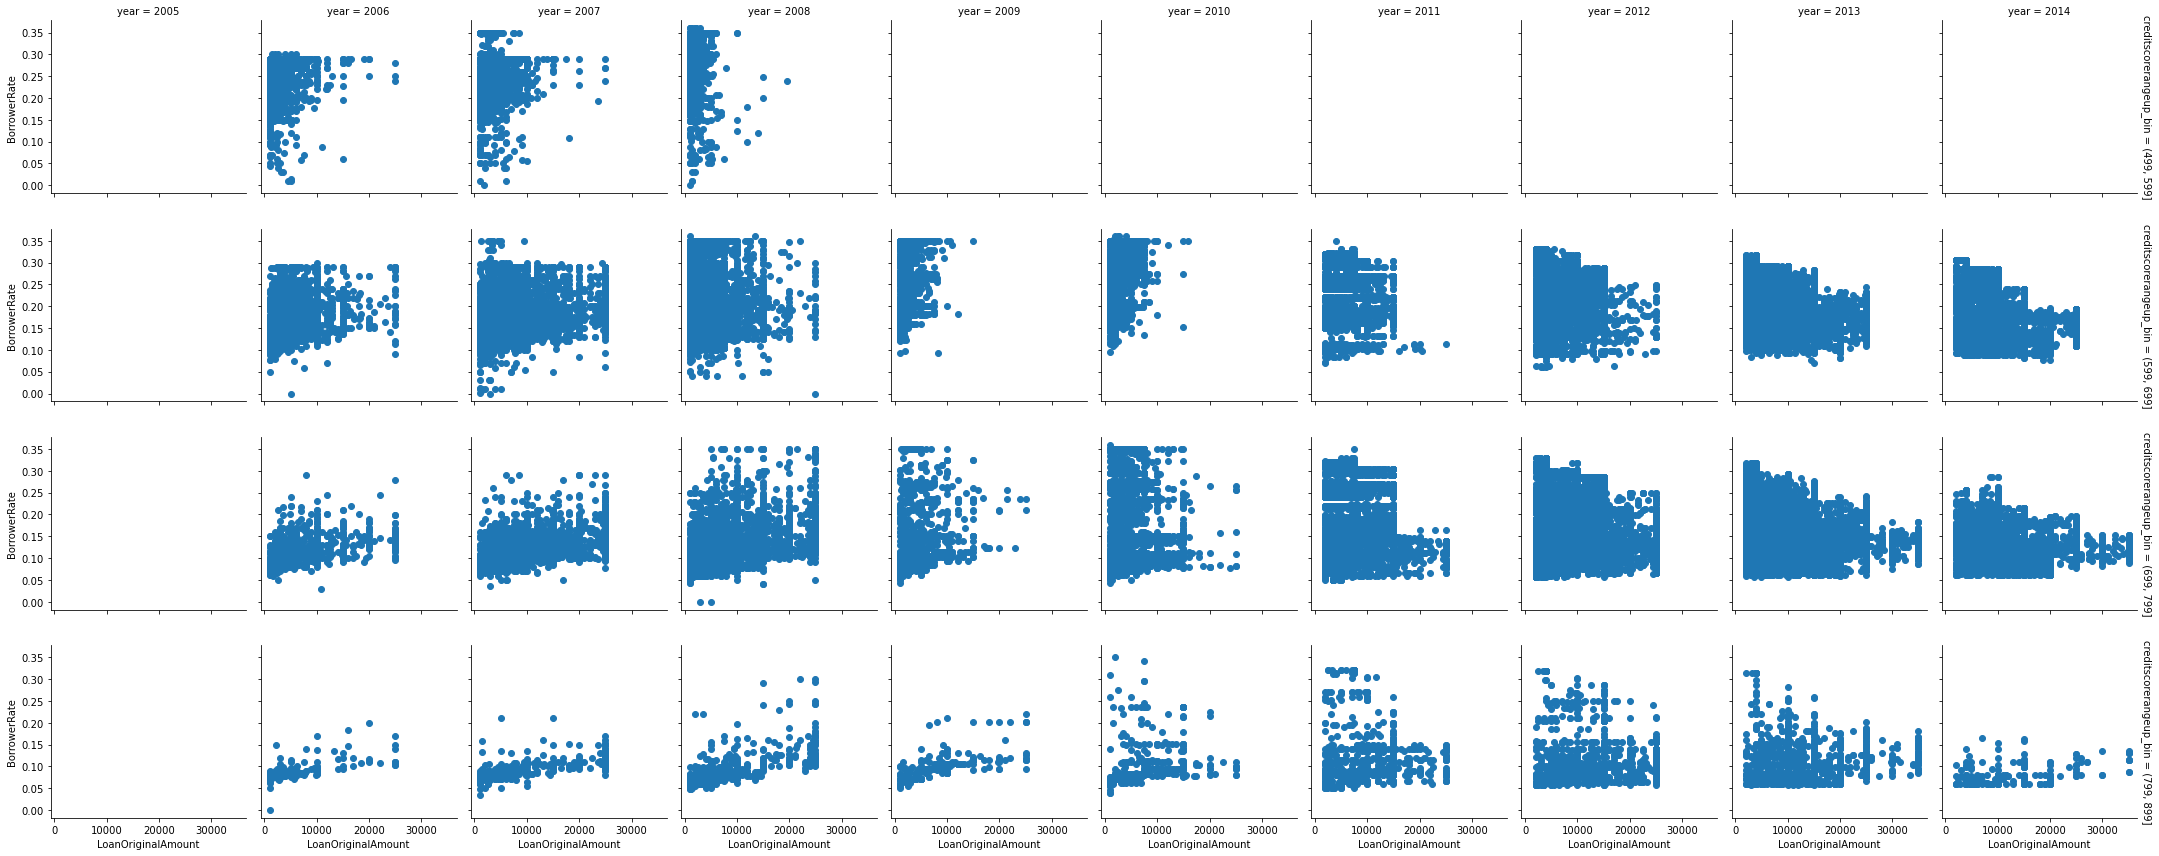

In [544]:
g = sb.FacetGrid(data = df_subset, col = 'year', row = 'creditscorerangeup_bin',
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')


Observations on Credit Score Range and Loan Origination Amount

Limited Presence of Low Credit Scores:

The lowest CreditScoreRangeUpper (499, 599) was only recorded between 2006 and 2008.
This suggests that lending practices may have changed to limit offerings to this group. The financial landscape during this period, particularly around the 2008 financial crisis, may have contributed to this trend.

Concentration in Higher Credit Score Buckets:
The majority of LoanOriginalAmounts originate from the two higher CreditScoreUpper buckets: (599, 699) and (699, 799). This trend indicates that lenders are more willing to extend larger loans to borrowers who fall within these ranges, likely because they are perceived as lower risk.

Implications of These Observations
Market Shifts: The absence of loans for the lowest credit score range in later years may reflect stricter lending criteria adopted by financial institutions following the recession, leading to a focus on borrowers with better credit profiles.

Lending Strategies: Lenders may need to consider offering tailored products or programs aimed at borrowers in the (499, 599) range to encourage responsible borrowing and improve credit scores over time.

Conclusion
These findings underscore significant shifts in the lending landscape over time, particularly regarding credit score and loan origination amounts. The data suggests a more cautious approach by lenders, favoring borrowers with stronger credit profiles, which may have implications for financial inclusion and access to credit for those with lower scores.

### Want to examine the picture of Region/Average of BorrowerRate/CreditScoreRangeUpper

C:\Users\ngoct\AppData\Local\Temp\ipykernel_5156\3005263427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_means = df_subset.groupby(['creditscorerangeup_bin', 'Region']).mean()['BorrowerRate']


Text(0.5, 1.0, 'Heatmap of Average BorrowerRate based on Region and CreditScoreRangeUpper  ')

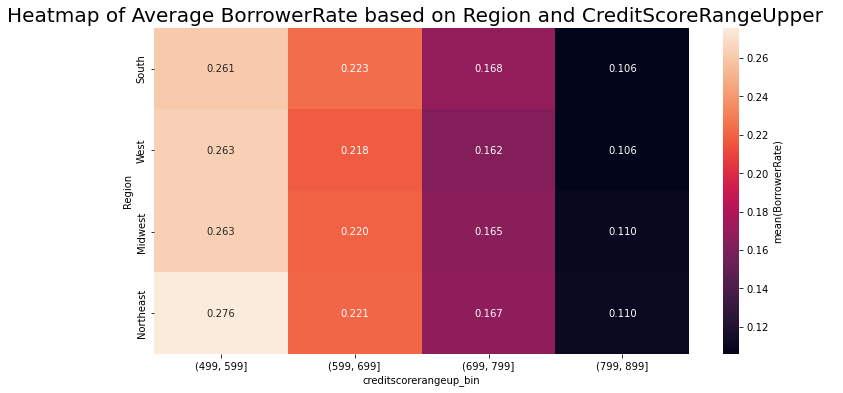

In [550]:
cat_means = df_subset.groupby(['creditscorerangeup_bin', 'Region']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Region', columns = 'creditscorerangeup_bin',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})
plt.title("Heatmap of Average BorrowerRate based on Region and CreditScoreRangeUpper  ", fontsize =20)


Key Points

Credit Score Ranges and Borrower Rates:
Lowest Credit Score Range (499-599): Borrowers in this range experience the highest average BorrowerRate. This suggests that lenders perceive them as higher risk, leading to higher interest rates to compensate for that risk.
Highest Credit Score Range (799-899): Borrowers in this category enjoy the lowest average BorrowerRate. This indicates that they are seen as lower risk by lenders, resulting in more favorable interest rates.

Risk Assessment by Lenders:
Lenders use credit scores as a key factor in assessing the risk associated with lending to a borrower. Lower credit scores often indicate past financial difficulties, missed payments, or high levels of debt, prompting lenders to charge higher rates to mitigate potential losses.

Conclusion
Overall, the trend noted underscores the inverse relationship between credit score and BorrowerRate: as credit scores improve, the average BorrowerRate decreases. This relationship is crucial for understanding lending practices and their impact on different borrower segments.

### I want to examine the picture of Region/Average of LoanOriginalAmount/CreditScoreRangeUpper

C:\Users\ngoct\AppData\Local\Temp\ipykernel_5156\899286547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_means = df_subset.groupby(['creditscorerangeup_bin', 'Region']).mean()['LoanOriginalAmount']


Text(0.5, 1.0, 'Heatmap of Average LoanOriginalAmount based on Region and CreditScoreRangeUpper  ')

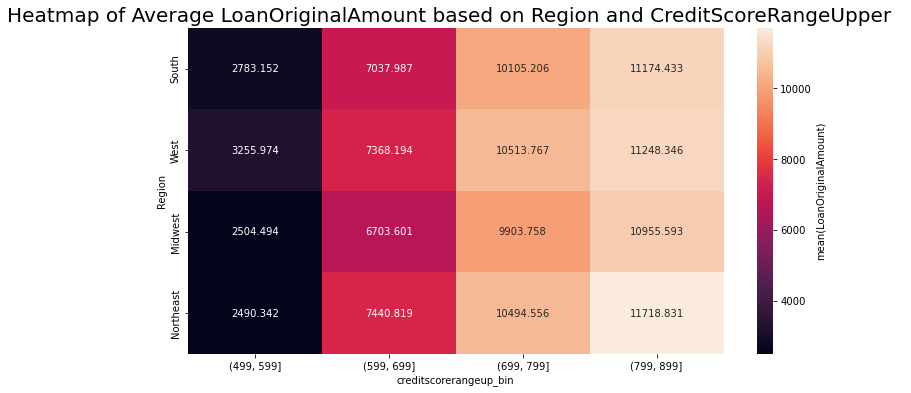

In [551]:
cat_means = df_subset.groupby(['creditscorerangeup_bin', 'Region']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Region', columns = 'creditscorerangeup_bin',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'})
plt.title("Heatmap of Average LoanOriginalAmount based on Region and CreditScoreRangeUpper  ", fontsize =20)

Key Observations
Spread Between Credit Score Ranges:
(499,599) to (599,699): The average LoanOriginalAmount spread is around $4,000.
(599,699) to (699,799): The average LoanOriginalAmount spread is around $3,000.
(699,799) to (799,899): The average LoanOriginalAmount spread is around $1,000.

Analysis of the Spreads

1.Decreasing Spread:
The spread between LoanOriginalAmount decreases as you move to higher credit score ranges. This suggests that the difference in borrowing amounts tends to narrow as credit scores improve.
Borrowers with lower credit scores (499-599) might have significantly lower loan amounts due to higher perceived risk, leading lenders to offer less.

2.Implications for Borrowers:
Lower Credit Score Ranges: Borrowers in the lowest credit score range may struggle to secure loans of higher amounts, as lenders are more cautious.
Middle Credit Score Ranges: As borrowers move into the middle credit score ranges (599-699, 699-799), they can secure slightly higher loan amounts, but the increase is less pronounced than when transitioning from very low to moderate scores.
Higher Credit Score Ranges: At the highest credit score ranges (799-899), borrowers may still see lower average loan amounts compared to the middle range, but the overall difference is less than for lower score categories.

3.Conclusion
This analysis highlights the relationship between creditworthiness and borrowing capability, illustrating how financial institutions adjust loan offerings based on perceived risk associated with credit scores. The decreasing spread in average loan amounts across the credit score ranges reflects lenders' increasing confidence in borrowers' repayment abilities as their credit scores improve.

### I want to examine the LoanOriginalAmount grouped by Year of Origination and CreditScoreRangeUpper

C:\Users\ngoct\AppData\Local\Temp\ipykernel_5156\314227049.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['LoanOriginalAmount']


Text(0.5, 1.0, 'Heatmap of Average LoanOriginalAmount based on Loan OriginationDate by Year and CreditScoreRangeUpper  ')

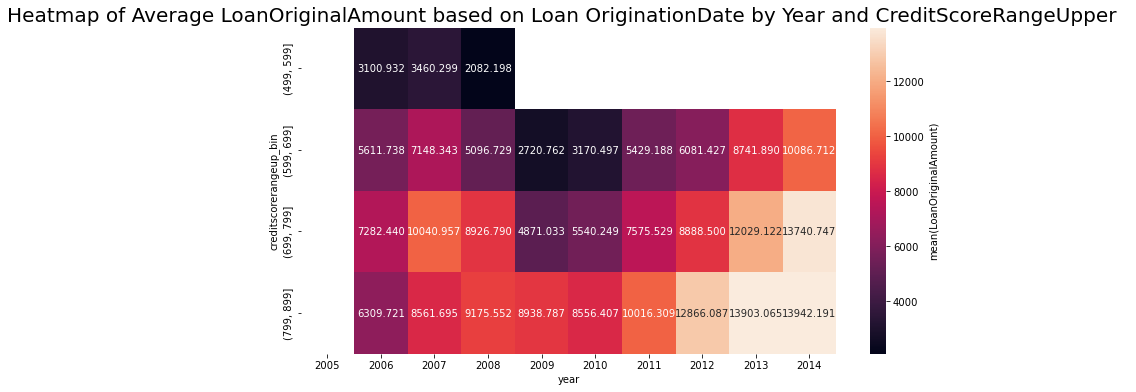

In [552]:
cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'creditscorerangeup_bin', columns = 'year',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'})
plt.title("Heatmap of Average LoanOriginalAmount based on Loan OriginationDate by Year and CreditScoreRangeUpper  ", fontsize =20)

Summary of Observations

Doubling of Average Loan Amount:
The average LoanOriginalAmount increased significantly from 2006 to 2014, indicating a substantial growth in the amount borrowers are seeking or qualifying for over these years. This could suggest increased consumer confidence, improved economic conditions, or more favorable lending practices during this period.

CreditScoreRangeUpper (799,899):
The average LoanOriginalAmount exceeding $10,000 was noted during the years 2011 to 2014. This indicates that borrowers within this highest credit score range were likely able to secure larger loans as their creditworthiness is generally seen as favorable by lenders.

CreditScoreRangeUpper (699,799):
Average LoanOriginalAmount above $10,000 was observed in 2007, and from 2013 to 2014. This suggests that even borrowers with slightly lower credit scores were able to access relatively substantial loan amounts, particularly in the later years, reflecting perhaps a shift in lending practices or market conditions.

CreditScoreRangeUpper (599,699):
The average LoanOriginalAmount exceeded $10,000 only in 2014. This indicates that borrowers in this lower credit score range may have been more limited in their access to larger loans until the end of the observation period, which could be due to heightened risk assessments by lenders or tighter lending standards.


### I want to analyze the average BorrowerRate by year of origination and CreditScoreRangeUpper.

C:\Users\ngoct\AppData\Local\Temp\ipykernel_5156\2508288156.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['BorrowerRate']


Text(0.5, 1.0, 'Heatmap of Average BorrowerRate based on OriginationDate by Year and CreditScoreRangeUpper  ')

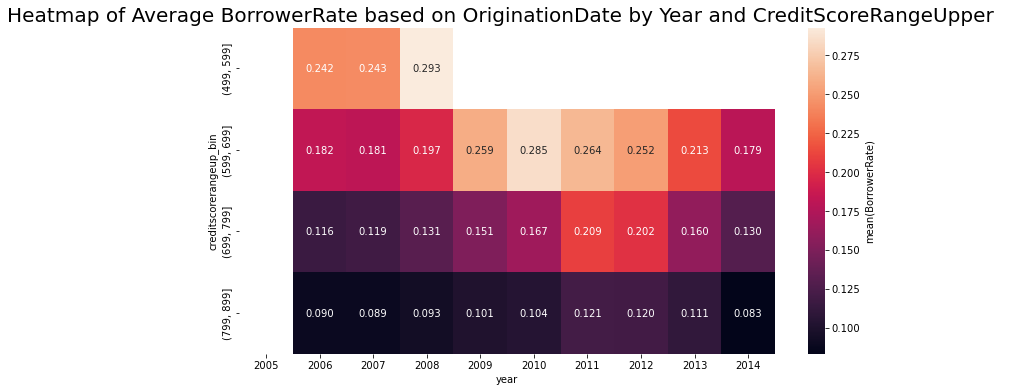

In [553]:
cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'creditscorerangeup_bin', columns = 'year',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})
plt.title("Heatmap of Average BorrowerRate based on OriginationDate by Year and CreditScoreRangeUpper  ", fontsize =20)

Overall, the higher the CreditScoreRangeUpper, the lower the average BorrowerRate.

## Conclusions



Relationships Observed

1.BorrowerRate and Loan Origination Amount by ProsperRating:
    Larger loan amounts (in purple) are associated with higher ProsperRatings (4 and above).
    The higher the ProsperRating, the more significant loans are present, and they typically have lower BorrowerRates as ProsperRating increases.
    At the lower ProsperRating range (1 to 2), loans are fewer, balances are small (less than $5k), but BorrowerRates are high.
    ProsperRating = 4 stands out with the most loans, where BorrowerRates generally range between 0.17 and 0.25, with only two outliers having a BorrowerRate above 0.3.
    
2.BorrowerRate/LoanOriginalAmount by Region and CreditScoreUpper:
    Across all regions, borrowers with lower CreditScoreUpper ranges experience higher BorrowerRates, while higher CreditScoreUpper ranges yield lower BorrowerRates.

3.LoanOriginalAmount and CreditScoreUpper:
    Regardless of the region, borrowers with lower CreditScoreUpper ranges receive smaller loan amounts.
    Most of the LoanOriginalAmounts fall within the CreditScoreUpper buckets of 599-699 and 699-799.
    
4.Region and Average BorrowerRate by CreditScoreUpper:
    Borrowers in the lowest CreditScoreUpper range (499-599) face the highest average BorrowerRates.
    In contrast, borrowers in the highest CreditScoreUpper range (799-899) benefit from the lowest average BorrowerRates.
    The general trend indicates that better credit scores lead to lower BorrowerRates.
    
5.Average BorrowerRate by Year and CreditScoreUpper:
    Consistently, higher CreditScoreUpper values are associated with lower average BorrowerRates.
    
Surprising Interactions

1.BorrowerRate and Loan Origination by Year:
    In 2006, loan origination was minimal, but the minimum BorrowerRate was relatively high compared to later years.
    Similarly, in 2009, loan origination was low, likely due to the recession.
    The years 2012 and 2013 saw the highest loan origination activity, with a wide range of BorrowerRates.
    
2.LoanOriginalAmount by Year and CreditScoreUpper:
    The average LoanOriginalAmount doubled between 2006 and 2014.
    In the highest CreditScoreUpper bucket (799-899), average LoanOriginalAmounts above $10k were observed only from 2011 to 2014.
    For the 699-799 CreditScoreUpper bucket, loans above $10k appeared in 2007, 2013, and 2014.
    For the 599-699 CreditScoreUpper bucket, loans above $10k were seen only in 2014.
    
3.LoanOriginalAmount Spread by CreditScoreUpper:
    The difference in average LoanOriginalAmount between the 499-599 and 599-699 CreditScoreUpper ranges is about $4k.
    The spread between the 599-699 and 699-799 CreditScoreUpper ranges is around $3k.
    The spread between the 699-799 and 799-899 ranges is around $1k.
    
This analysis reveals that credit score has a significant impact on both loan origination amounts and BorrowerRates, with higher credit scores leading to better loan conditions across years and regions.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

